<a href="https://colab.research.google.com/github/valegb13/Proyecto-IA/blob/main/TCOYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto inteligencia artificial: Detector de fertilidad por medio del método de temperatura basal

---



Integrantes:

---


*   Valentina Galvis Bergsneider 2182038
*   Laura Alexandra Hernandez Pérez 2182054
*   Neyder Fabián Mosquera Niño 2182078


In [128]:
#@title **Importar Drive** { display-mode: "form" }
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
#@title **Cargar Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [249]:
#@title **Cargar Dataset** { display-mode: "form" }
dataset = pd.read_csv('/content/gdrive/MyDrive/Proyecto_IA/Dataset.csv')

In [250]:
#@title **Una vez se obtiene el dataset se procede a arreglarlo para poder comenzar a trabajar con sus datos** { display-mode: "form" }
dataset.head(17)

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo
0,3/8/2021,NaN,1,NaN,NaN,NaN,NaN,1
1,4/8/2021,NaN,1,NaN,NaN,NaN,NaN,2
2,5/8/2021,NaN,1,NaN,NaN,NaN,NaN,3
3,6/8/2021,36.39,1,NaN,NaN,1.0,NaN,4
4,7/8/2021,36.29,1,NaN,NaN,NaN,NaN,5
5,8/8/2021,36.29,1,NaN,NaN,NaN,NaN,6
6,9/8/2021,36.24,1,NaN,NaN,NaN,NaN,7
7,10/8/2021,36.10,1,NaN,NaN,NaN,NaN,8
8,11/8/2021,36.31,0,NaN,NaN,NaN,NaN,9
9,12/8/2021,36.41,0,NaN,NaN,1.0,NaN,10


In [265]:
#@title **code:** Los valores en las condiciones de exclusión de temperatura si eran NaN se vuelven 0, también se agrega una columna nueva llamada "Ciclo"

dataset.Bebio.fillna(0, inplace=True)
dataset.Enferma.fillna(0, inplace=True)
dataset.Mal_Sueño.fillna(0, inplace=True)
dataset.Algoritmo.fillna(0, inplace=True)
dataset['Ciclo']=1
dataset['P_Dia_Ciclo']=1
dataset.head(178)

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo
0,3/8/2021,NaN,1,0.0,0.0,0.0,0.0,1,1
1,4/8/2021,NaN,1,0.0,0.0,0.0,0.0,2,1
2,5/8/2021,NaN,1,0.0,0.0,0.0,0.0,3,1
3,6/8/2021,36.39,1,0.0,0.0,1.0,0.0,4,1
4,7/8/2021,36.29,1,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...
173,23/1/2022,36.44,1,0.0,0.0,0.0,0.0,6,1
174,24/1/2022,36.44,0,0.0,0.0,0.0,0.0,7,1
175,25/1/2022,36.30,0,0.0,0.0,0.0,0.0,8,1
176,26/1/2022,36.11,0,0.0,0.0,0.0,0.0,9,1


In [263]:
#k=dataset.iloc[0]['Dia_Ciclo'] Se procede a arreglar la columna dataset, para que cada vez que pase por un día 1 de ciclo, cambie el número de
p=0
z=0
cic=0
dataset.at[p,'Ciclo']=cic
k=1
tam=dataset.shape[0]
t=0
while t <= tam:
  cic=cic+1
  while z!=k:
    p=p+1 
    z=dataset.iloc[p]['Dia_Ciclo']
    dataset.at[p-1,'Ciclo']=cic
  t=p
  z=0

dataset.head(178)

IndexError: ignored

In [264]:
dataset.head(178)



1


,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo
0,3/8/2021,NaN,1,0.0,0.0,0.0,0.0,1,1
1,4/8/2021,NaN,1,0.0,0.0,0.0,0.0,2,1
2,5/8/2021,NaN,1,0.0,0.0,0.0,0.0,3,1
3,6/8/2021,36.39,1,0.0,0.0,1.0,0.0,4,1
4,7/8/2021,36.29,1,0.0,0.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...
173,23/1/2022,36.44,1,0.0,0.0,0.0,0.0,6,7
174,24/1/2022,36.44,0,0.0,0.0,0.0,0.0,7,7
175,25/1/2022,36.30,0,0.0,0.0,0.0,0.0,8,7
176,26/1/2022,36.11,0,0.0,0.0,0.0,0.0,9,7


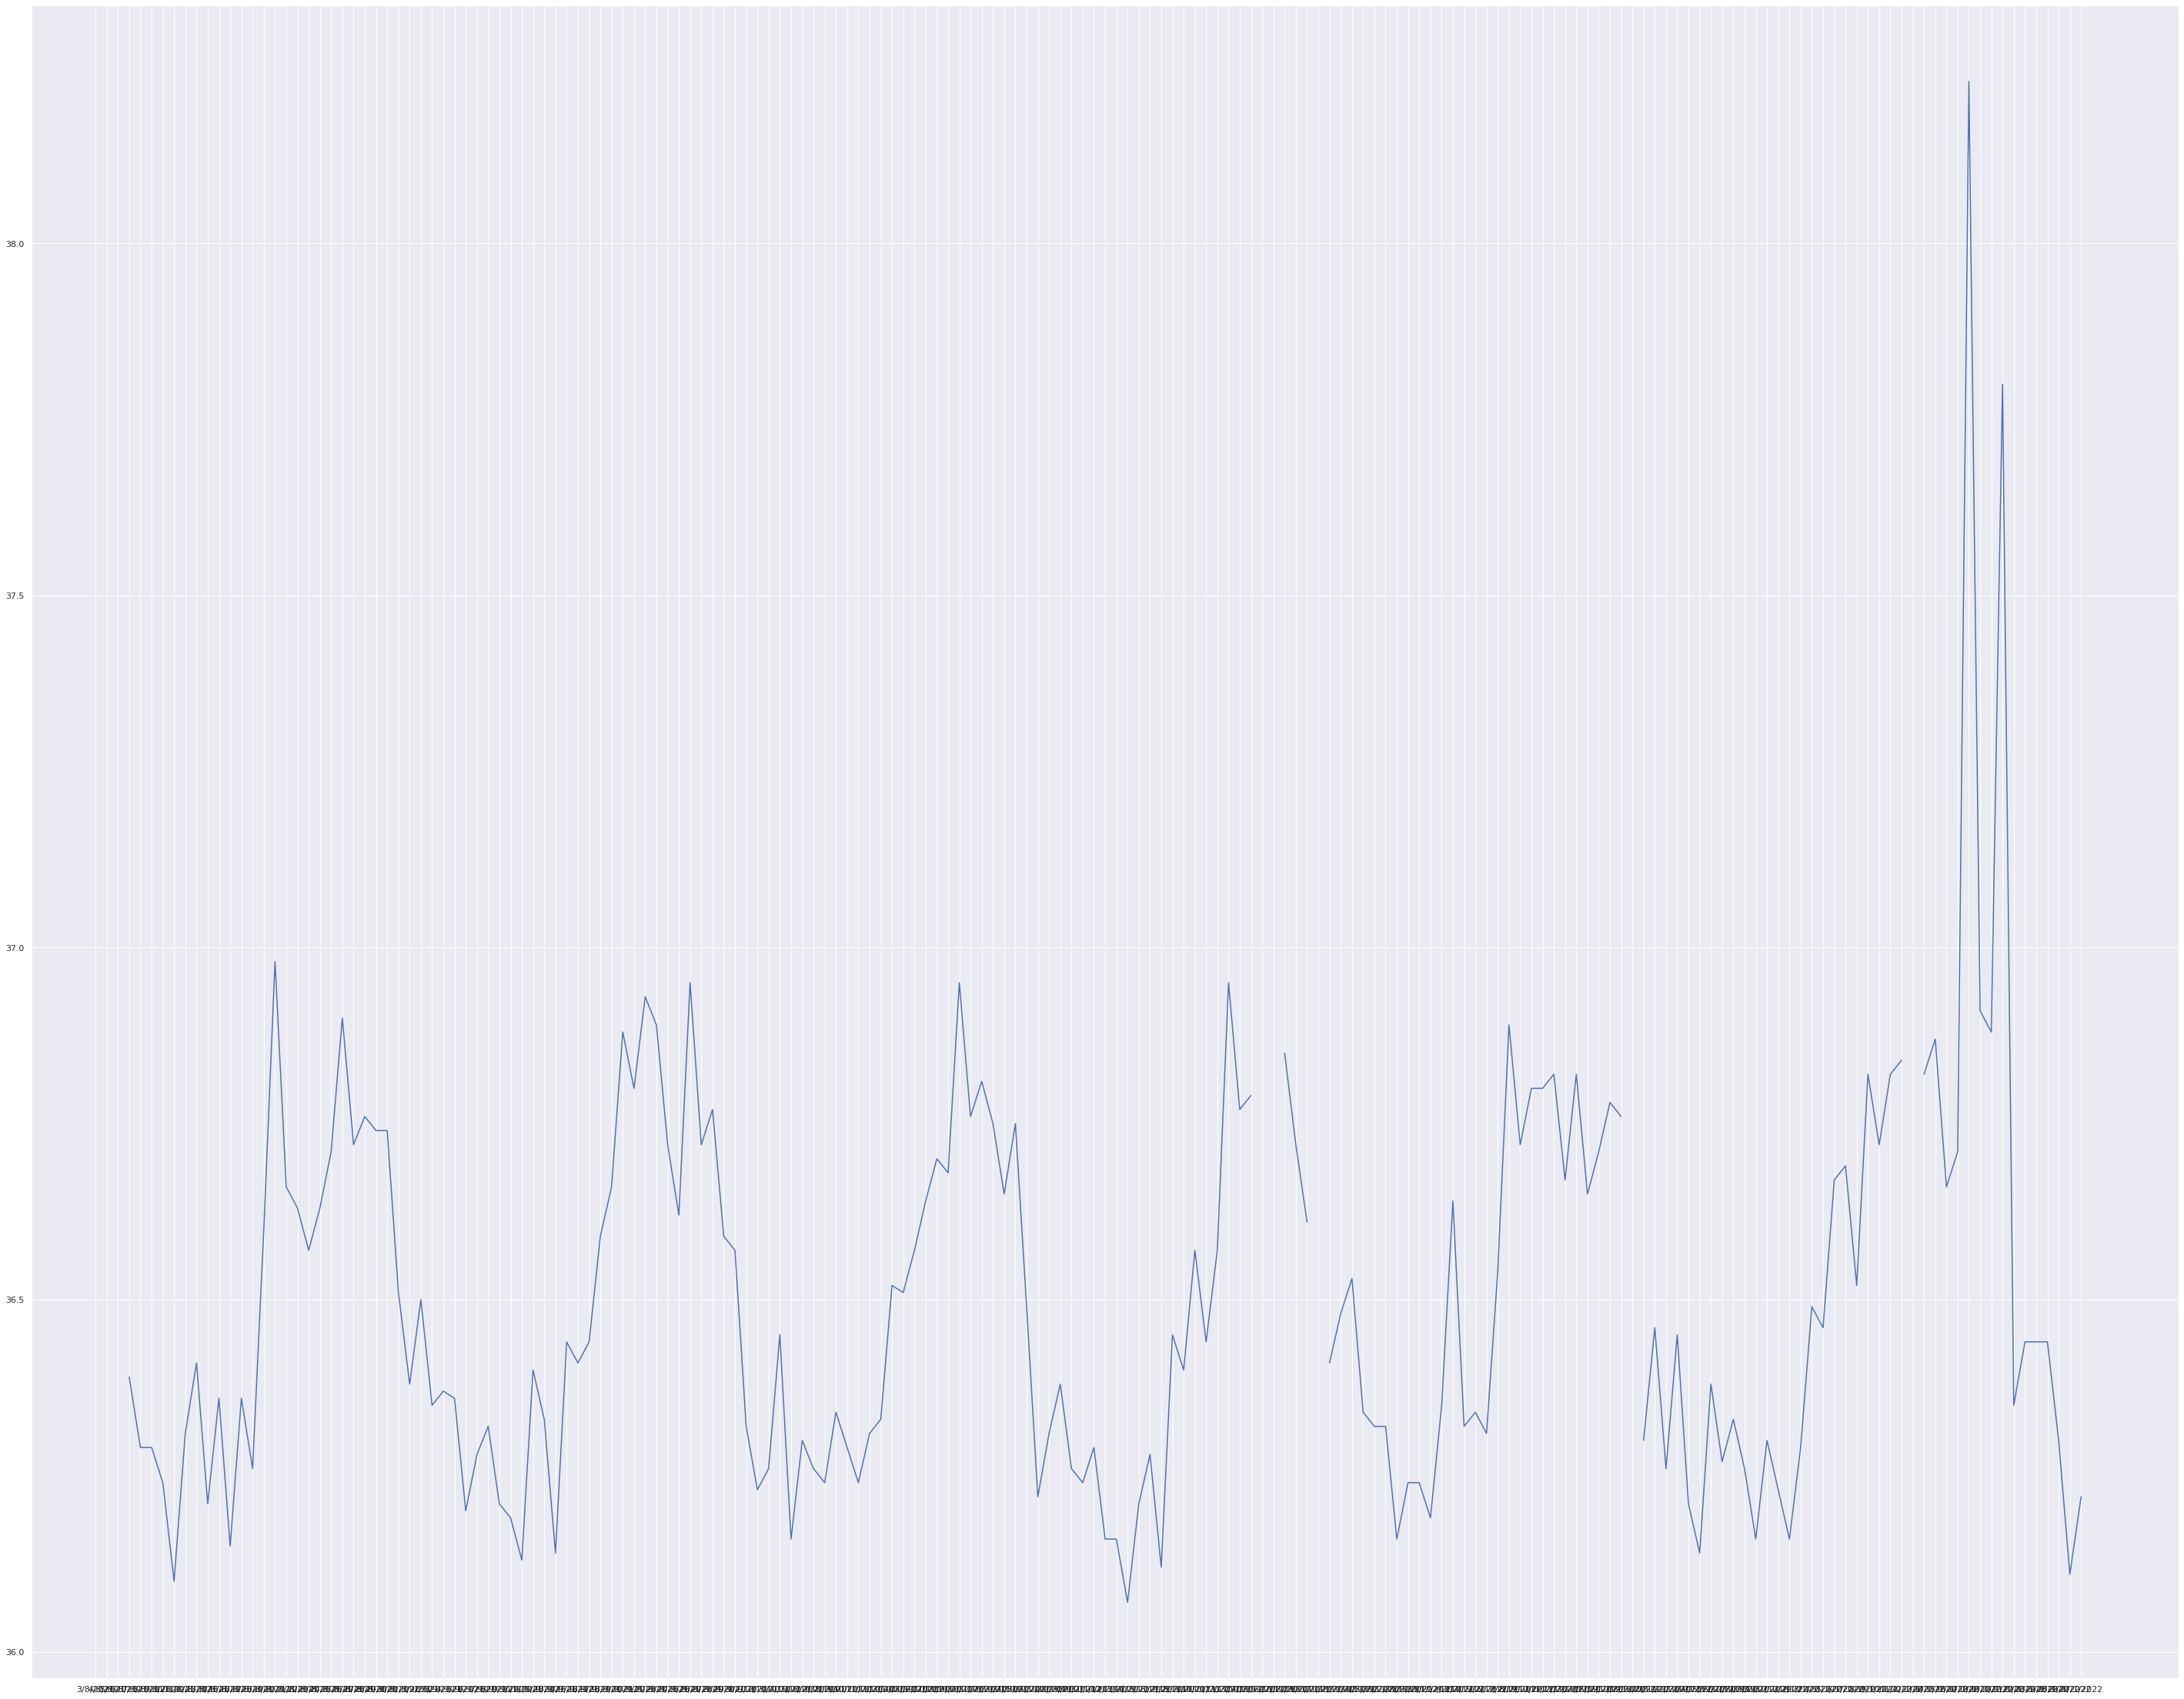

In [271]:
plt.figure(figsize=(50,40))
plt.plot(dataset['Fecha'],dataset['Temperatura'])
